![](https://digimedsystems.com/images/run-a-cell.png)

In [ ]:
# Install fastai2 from pypi
!pip install fastai2

In [0]:
# fastai2 imports
from fastai2.vision.all import *

## End-to-End Training Workflow

![](https://digimedsystems.com/images/end-to-end-training-workflow-medium.png)

## 1- Download Data
Download dataset and save in `~/.fastai/data` folder

In [3]:
path = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(path/"train.csv")

In [5]:
df.sample(5)

,fname,labels,is_valid
1379,002747.jpg,chair,True
394,000806.jpg,person,True
3798,007533.jpg,boat,True
3394,006734.jpg,car,False
238,000489.jpg,bird,False


## 2- Create a fastai2 DataBlock
Check out the video below for more details

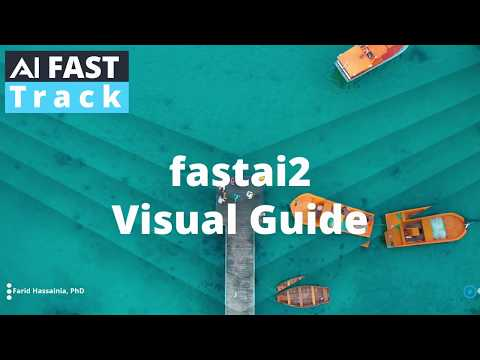

In [0]:
from IPython.display import YouTubeVideo
# Image classification with a single label (Pet Dataset)
# Video credit: AI Fast Track.
YouTubeVideo('BBMTeK_zYdw', width=600, height=400) 

![](https://digimedsystems.com/images/image-classification-multi-label-medium.png)

In [0]:
# Create a DataBlock: check the animation shown in the video and/or the the illustration here above 
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=ColReader(0, pref=path/"train"),
                   get_y=ColReader(1, label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

## 3- Create a DataLoaders Object

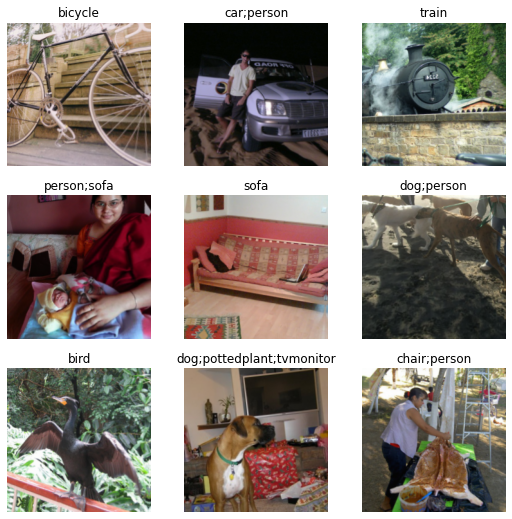

In [7]:
# Create a DataLoaders objet
# Show a sample batch
dls = dblock.dataloaders(df)
dls.show_batch()

## 4- Create a Learner Object
In this example we are using a pretrained resnet34 model.

In [8]:
# Create a Learner object. The latter wraps:
# - A DataLoaders object: dls
# - A model: a pretrained restnet34
# - A function loss: set automatically in this case
# - A metrics: error_rate

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


## 5- Train model
`fine_tune` method takes care of training the model by following these 2 steps:

1- Freeze the model body, and only train the head.

2- Unfreeze the body, and train the whole model.

More on these techniques soon!

In [9]:
# Fine tune resnet model pretrained with the ImageNet dataset
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.916208,0.669886,0.258984,00:36
1,0.786545,0.523187,0.345139,00:35
2,0.570482,0.161911,0.865159,00:37
3,0.327890,0.087298,0.963765,00:35


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.104335,0.088295,0.959761,00:43
1,0.090010,0.078577,0.968207,00:43
2,0.071798,0.074980,0.967410,00:43


## Congratulations and Happy Learning!